In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import joblib

In [ ]:
# Load the dataset
df = pd.read_csv("daily_dataset.csv")

# Convert Date column to datetime type with specified format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Convert Date column to timestamps
df['Date'] = df['Date'].astype(int) / 10**9  # Convert to Unix timestamps

In [ ]:
# Split the data into features and cabbage_price_per_1kg, Production, Resell_weight
X = df[['Date']]
y = df[['cabbage_price_per_1kg', 'Production', 'Resell_weight']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define a list of machine learning models to use
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=100, random_state=42)
]

# Train the models
for model in models:
    model.fit(X_train, y_train)

In [ ]:
# Make predictions
predictions = [model.predict(X_test) for model in models]

# Evaluate the models
for i, model in enumerate(models):
    mse = mean_squared_error(y_test, predictions[i])
    r2 = r2_score(y_test, predictions[i])
    print(f"Model {i+1}: MSE={mse}, R2={r2}")

Model 1: MSE=1284.701671173786, R2=0.1710404457264226
Model 2: MSE=627.8793897905823, R2=-0.398374285465455
Model 3: MSE=459.38907717201596, R2=-0.0019911231204108684


In [ ]:
# Save the best model
best_model_index = np.argmin([mean_squared_error(y_test, pred) for pred in predictions])
best_model = models[best_model_index]
joblib.dump(best_model, 'new_best_model.joblib')

['new_best_model.joblib']

<Axes: >

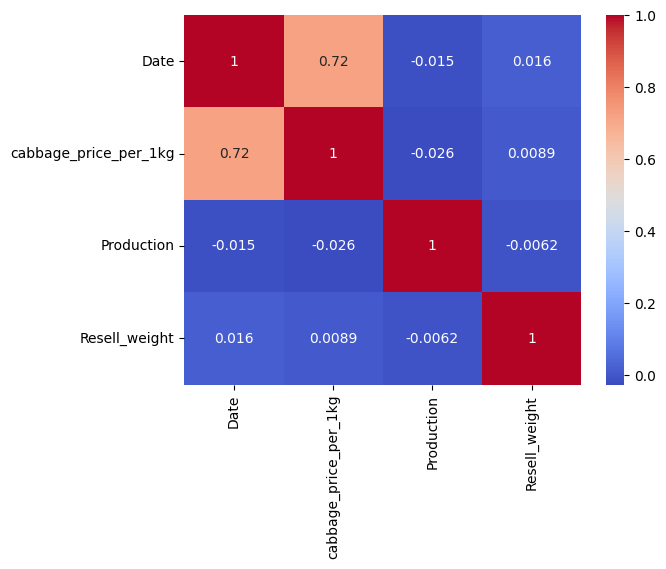

In [ ]:
import seaborn as sns

# Create a correlation matrix
corr = df.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
import pandas as pd
import numpy as np
import joblib

# Load the trained model
best_model = joblib.load('new_best_model.joblib')

# Preprocess the input date
date_to_test = input("Enter date (YYYY-MM-DD): ")
timestamp_to_test = pd.to_datetime(date_to_test).timestamp()

# Predict using the trained model
forecast_result = best_model.predict(np.array([[timestamp_to_test]]))

# Print the forecasted values
print("\nForecast for", date_to_test)
print("cabbage_price_per_1kg:", forecast_result[0][0])
print("Production:", forecast_result[0][1])
print("Resell_weight:", forecast_result[0][2])


Enter date (YYYY-MM-DD): 2004-01-01

Forecast for 2004-01-01
cabbage_price_per_1kg:: 133.1270322510001
Production: 212.87
Resell_weight: 7.64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import joblib

# Load the trained model
best_model = joblib.load('best_model.pkl')

# Preprocess the input date
date_to_test = input("Enter date (YYYY-MM-DD): ")
timestamp_to_test = pd.to_datetime(date_to_test).timestamp()

# Predict using the trained model
forecast_result = best_model.predict(np.array([[timestamp_to_test]]))

# Print the forecasted values
print("\nForecast for", date_to_test)
print("cabbage_price_per_1kg:", forecast_result[0][0])
print("Production:", forecast_result[0][1])
print("Resell_weight:", forecast_result[0][2])


Enter date (YYYY-MM-DD): 2022-01-03

Forecast for 2022-01-03
cabbage_price_per_1kg:: 174.75360807100034
Production: 240.42
Resell_weight: 13.15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print regression metrics
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")
print(f"MAE: {mae}")


MSE: 459.38907717201596
R2 Score: -0.0019911231204108684
MAE: 11.794114834271555


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming y_true and y_pred are your classification labels
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]

# Calculate and print classification report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print accuracy, precision, recall, and F1 score
accuracy = (conf_matrix.diagonal() / conf_matrix.sum(axis=1)).mean()
precision = conf_matrix.diagonal() / conf_matrix.sum(axis=0)
recall = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5

Confusion Matrix:
[[1 0 0]
 [1 0 0]
 [0 1 2]]
Accuracy: 0.5555555555555555
Precision: [0.5 0.  1. ]
Recall: [1.         0.         0.66666667]
F1 Score: [0.66666667        nan 0.8       ]


<ipython-input-60-d1785834f9b5>:20: RuntimeWarning: invalid value encountered in divide
  f1_score = 2 * (precision * recall) / (precision + recall)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

# Load the dataset
df = pd.read_csv("daily_dataset.csv")

# Convert Date column to datetime type with specified format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Convert Date column to timestamps
df['Date'] = df['Date'].astype(int) / 10**9  # Convert to Unix timestamps

# Define a target variable for classification (example: 1 if price increased, 0 if price decreased)
df['Price_Increase'] = (df['cabbage_price_per_1kg'].diff() > 0).astype(int)

# Split the data into features and target variable
X = df[['Date']]
y = df['Price_Increase']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of machine learning models to use
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42)
]

# Train the models
for model in models:
    model.fit(X_train, y_train)

# Make predictions
predictions = [model.predict(X_test) for model in models]

# Evaluate the models
for i, model in enumerate(models):
    print(f"Model {i+1} Classification Report:")
    print(classification_report(y_test, predictions[i]))

# Save the best model
best_model_index = np.argmax([model.score(X_test, y_test) for model in models])
best_model = models[best_model_index]
joblib.dump(best_model, 'best_classification_model.pkl')


Model 1 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       229
           1       0.56      1.00      0.72       289

    accuracy                           0.56       518
   macro avg       0.28      0.50      0.36       518
weighted avg       0.31      0.56      0.40       518

Model 2 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       229
           1       0.96      0.96      0.96       289

    accuracy                           0.95       518
   macro avg       0.95      0.95      0.95       518
weighted avg       0.95      0.95      0.95       518

Model 3 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       229
           1       0.96      0.96      0.96       289

    accuracy                           0.95       518
   macro avg       0.95      0.95  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['best_classification_model.pkl']